In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('tweets.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9999 non-null   int64 
 1   raw_text    9999 non-null   object
 2   label       9999 non-null   object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [4]:
train_data.shape

(9999, 3)

In [5]:
train_data.head(n=9999)

,Unnamed: 0,raw_text,label
0,0,@JanaBanana5 Oh my word...so tell me are you a...,negative
1,1,Just watched the series finale of Scrubs. Why ...,negative
2,2,Just screwed up the fried noodles by adding ra...,negative
3,3,@ladybug8320 5 weeks is a long time!,negative
4,4,Synching my contacts from my old mobile to iPh...,negative
...,...,...,...
9994,9994,BREAKING: Supreme Court convicts in disproport...,neutral
9995,9995,If @Mr_A_Johnson is up. #twitter is gona have ...,neutral
9996,9996,"#Microsoft #Cloud Oracle, Windows Garner Diffe...",neutral
9997,9997,@paulbentleymelb @apple I think they call that...,neutral


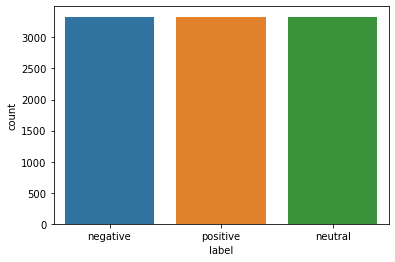

In [7]:
sns.countplot(x='label', data=train_data)

In [16]:
train_data['label'].value_counts()

neutral     3333
positive    3333
negative    3333
Name: label, dtype: int64

In [137]:
# Turn content of csv file into a tuple of (list with review words, labels)

import csv

def csv_to_tuple():

    with open('tweets.csv', newline='') as f:
        reader = csv.reader(f)
        data = [tuple(row) for row in reader]
        reviews = []
        labels = []
        for i in range(len(data)):
            if i == 0:
                continue
            for ind, string in enumerate(data[i]):
                if (ind == 1):
#                     if string[0] == '@':
#                         reviews.append(string.split()[1:])
#                     else:
#                         reviews.append(string.split())
                    reviews.append(extract_words(string))
                if (ind == 2):
                    labels.append(string)
    return(reviews, labels)

train_texts, train_labels = csv_to_tuple()
print(train_texts)
print(len(train_labels))

#Make list of reviews and labels, which associated with them

train_list_data = list(zip(train_texts, train_labels))

[['@', 'janabanana', '5', 'oh', 'my', 'word', '.', '.', '.', 'so', 'tell', 'me', 'are', 'you', 'a', 'mother', 'of', 'four', 'now', '?', 'lol', 'i', "'", 'm', 'so', 'sorry', '.'], ['just', 'watched', 'the', 'series', 'finale', 'of', 'scrubs', '.', 'why', 'must', 'all', 'good', 'shows', 'end', '?'], ['just', 'screwed', 'up', 'the', 'fried', 'noodles', 'by', 'adding', 'raw', 'garnishes', 'to', 'the', 'seasoning', '!'], ['@', 'ladybug', '8', '3', '2', '0', '5', 'weeks', 'is', 'a', 'long', 'time', '!'], ['synching', 'my', 'contacts', 'from', 'my', 'old', 'mobile', 'to', 'iphone', '.', 'import', 'does', 'not', 'work', 'well'], ['@', 'thedistraction', 'im', 'seeing', 'mewithoutyou', 'that', 'night', 'in', 'nyc', 'otherwise', 'i', 'would', 'go'], ['@', 'ksmith', '2', '0', '0', '9', 'awww'], ['@', 'jennifer', '_', 'wagner', 'how', 'can', 'we', 'earn', 'some', 'really', 'quick', 'money', 'to', 'go', 'out', 'there', '?', '!', '!', '!', '!', '?', '?', 'we', 'cannnn', '.', '.', '.', '.', '.', '.', 

In [138]:
print(train_list_data)

[(['@', 'janabanana', '5', 'oh', 'my', 'word', '.', '.', '.', 'so', 'tell', 'me', 'are', 'you', 'a', 'mother', 'of', 'four', 'now', '?', 'lol', 'i', "'", 'm', 'so', 'sorry', '.'], 'negative'), (['just', 'watched', 'the', 'series', 'finale', 'of', 'scrubs', '.', 'why', 'must', 'all', 'good', 'shows', 'end', '?'], 'negative'), (['just', 'screwed', 'up', 'the', 'fried', 'noodles', 'by', 'adding', 'raw', 'garnishes', 'to', 'the', 'seasoning', '!'], 'negative'), (['@', 'ladybug', '8', '3', '2', '0', '5', 'weeks', 'is', 'a', 'long', 'time', '!'], 'negative'), (['synching', 'my', 'contacts', 'from', 'my', 'old', 'mobile', 'to', 'iphone', '.', 'import', 'does', 'not', 'work', 'well'], 'negative'), (['@', 'thedistraction', 'im', 'seeing', 'mewithoutyou', 'that', 'night', 'in', 'nyc', 'otherwise', 'i', 'would', 'go'], 'negative'), (['@', 'ksmith', '2', '0', '0', '9', 'awww'], 'negative'), (['@', 'jennifer', '_', 'wagner', 'how', 'can', 'we', 'earn', 'some', 'really', 'quick', 'money', 'to', 'go'

In [80]:
from string import punctuation, digits

def extract_words(input_string):
    for c in punctuation + digits:
        input_string = input_string.replace(c, ' ' + c + ' ')
    if input_string[0] == '@':
        input_string.append(string.split()[1:])
    return input_string.lower().split()

In [140]:
def bag_of_words(texts):
    dictionary = {}     # maps word to unique index
    for text in texts:
        str_text = ' '.join(word for word in text)
        word_list = extract_words(str_text)
        for word in word_list:
            if word not in dictionary:
                dictionary[word] = len(dictionary)
    return dictionary

In [141]:
print(bag_of_words(train_texts))

{'@': 0, 'janabanana': 1, '5': 2, 'oh': 3, 'my': 4, 'word': 5, '.': 6, 'so': 7, 'tell': 8, 'me': 9, 'are': 10, 'you': 11, 'a': 12, 'mother': 13, 'of': 14, 'four': 15, 'now': 16, '?': 17, 'lol': 18, 'i': 19, "'": 20, 'm': 21, 'sorry': 22, 'just': 23, 'watched': 24, 'the': 25, 'series': 26, 'finale': 27, 'scrubs': 28, 'why': 29, 'must': 30, 'all': 31, 'good': 32, 'shows': 33, 'end': 34, 'screwed': 35, 'up': 36, 'fried': 37, 'noodles': 38, 'by': 39, 'adding': 40, 'raw': 41, 'garnishes': 42, 'to': 43, 'seasoning': 44, '!': 45, 'ladybug': 46, '8': 47, '3': 48, '2': 49, '0': 50, 'weeks': 51, 'is': 52, 'long': 53, 'time': 54, 'synching': 55, 'contacts': 56, 'from': 57, 'old': 58, 'mobile': 59, 'iphone': 60, 'import': 61, 'does': 62, 'not': 63, 'work': 64, 'well': 65, 'thedistraction': 66, 'im': 67, 'seeing': 68, 'mewithoutyou': 69, 'that': 70, 'night': 71, 'in': 72, 'nyc': 73, 'otherwise': 74, 'would': 75, 'go': 76, 'ksmith': 77, '9': 78, 'awww': 79, 'jennifer': 80, '_': 81, 'wagner': 82, 'ho